<a href="https://colab.research.google.com/github/anuj-l22/PRML_Project/blob/main/PRML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz

--2024-03-26 09:53:17--  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243346528 (232M) [application/x-gzip]
Saving to: ‘lfw-funneled.tgz’

lfw-funneled.tgz    100%[===================>] 232.07M   172KB/s    in 4m 5s   

2024-03-26 09:57:22 (971 KB/s) - ‘lfw-funneled.tgz’ saved [243346528/243346528]



In [2]:
!tar -xvzf lfw-funneled.tgz

Streaming output truncated to the last 5000 lines.
lfw_funneled/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw_funneled/Delphine_Chuillot/
lfw_funneled/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw_funneled/Paul_LeClerc/
lfw_funneled/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw_funneled/Eddie_Jordan/
lfw_funneled/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw_funneled/Lionel_Richie/
lfw_funneled/Lionel_Richie/Lionel_Richie_0001.jpg
lfw_funneled/Lionel_Richie/Lionel_Richie_0002.jpg
lfw_funneled/Jose_Viegas_Filho/
lfw_funneled/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw_funneled/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw_funneled/Roger_Mahony/
lfw_funneled/Roger_Mahony/Roger_Mahony_0001.jpg
lfw_funneled/Clay_Aiken/
lfw_funneled/Clay_Aiken/Clay_Aiken_0001.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0002.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0003.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0004.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0005.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0006.jpg
lfw_fun

In [3]:
import os
from PIL import Image
import numpy as np

def load_lfw_dataset(dataset_path):
    dataset = []
    for person_name in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person_name)
        if os.path.isdir(person_path):
            for image_name in os.listdir(person_path):
                image_path = os.path.join(person_path, image_name)
                image = Image.open(image_path)
                image_array = np.array(image)
                dataset.append({'image': image_array, 'label': person_name})
    return dataset

# Usage
dataset_path = '/content/lfw_funneled'
lfw_dataset = load_lfw_dataset(dataset_path)
print(f"Loaded {len(lfw_dataset)} images.")

Loaded 13233 images.


In [4]:
X = [entry['image'] for entry in lfw_dataset]
y = [entry['label'] for entry in lfw_dataset]

# Convert y to numerical labels
label_to_index = {label: index for index, label in enumerate(set(y))}
y_numerical = [label_to_index[label] for label in y]
X_ = np.array(X)
print(f"Number of samples: {len(X)}")
print(f"Number of samples: {X_.shape}")
print(f"Number of unique labels: {len(set(y_numerical))}")

Number of samples: 13233
Number of samples: (13233, 250, 250, 3)
Number of unique labels: 5749


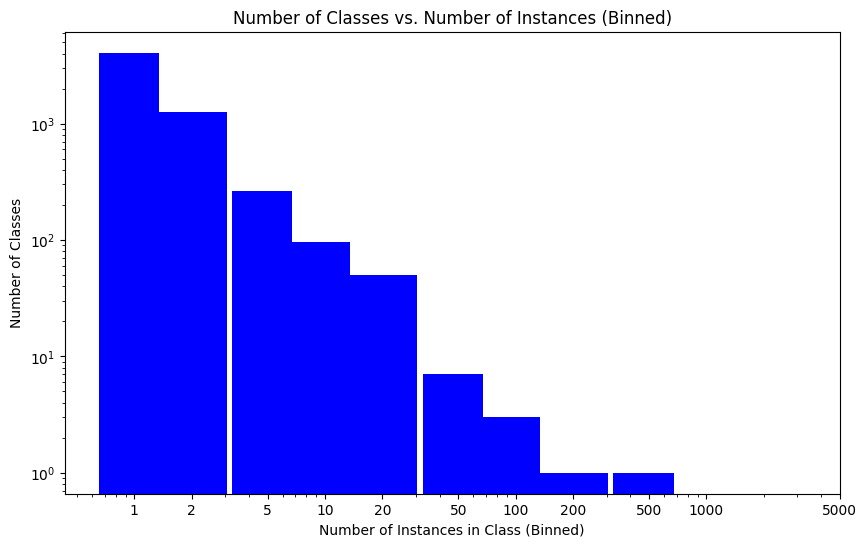

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_binned_class_histogram(y):
    # Count the number of instances per class
    class_counts = Counter(y)
    # Get the frequencies of instance counts
    instance_counts = list(class_counts.values())

    # Choose bin edges to suit the distribution
    # This creates bins that capture single instance classes, 2-5, 6-10, 11-20, etc.
    bins = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 5000]

    # Plot the histogram with the specified bins
    plt.figure(figsize=(10, 6))
    plt.hist(instance_counts, bins=bins, color='blue', rwidth=0.7, align='left')
    plt.xscale('log')  # Using a log scale for better visibility
    plt.yscale('log')  # Using a log scale for better visibility
    plt.title('Number of Classes vs. Number of Instances (Binned)')
    plt.xlabel('Number of Instances in Class (Binned)')
    plt.ylabel('Number of Classes')
    plt.xticks(bins, labels=[str(bin) for bin in bins])  # Set x-ticks to bin edges
    plt.show()

# Example usage
plot_binned_class_histogram(y)


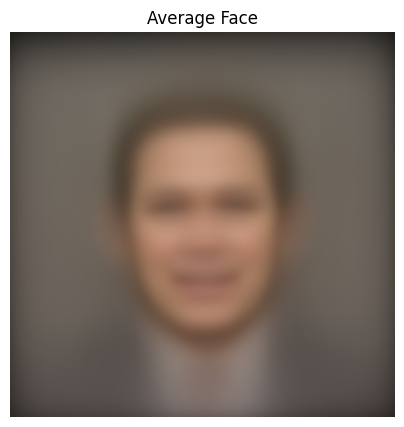

In [8]:
def display_average_face(X):
    avg_face = np.mean(X, axis=0).astype(np.uint8)
    plt.figure(figsize=(5, 5))
    plt.imshow(avg_face)
    plt.title('Average Face')
    plt.axis('off')
    plt.show()

display_average_face(X)


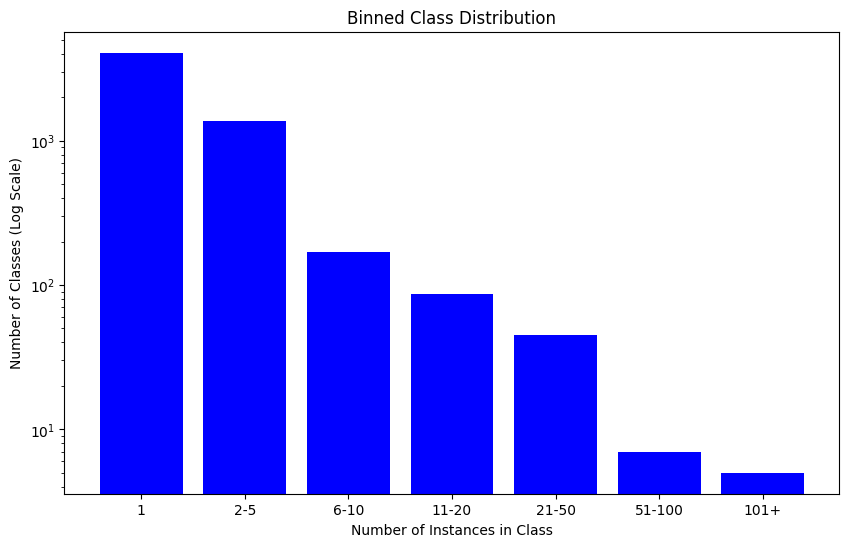

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_binned_class_distribution(y):
    # Count the number of instances per class
    class_counts = Counter(y)
    # Get the frequencies of instance counts
    frequencies = list(class_counts.values())

    # Bin the frequencies
    # For example, '1' means exactly 1 instance, '2-5' means between 2 to 5 instances, etc.
    bins = {'1': 0, '2-5': 0, '6-10': 0, '11-20': 0, '21-50': 0, '51-100': 0, '101+': 0}
    for frequency in frequencies:
        if frequency == 1:
            bins['1'] += 1
        elif 2 <= frequency <= 5:
            bins['2-5'] += 1
        elif 6 <= frequency <= 10:
            bins['6-10'] += 1
        elif 11 <= frequency <= 20:
            bins['11-20'] += 1
        elif 21 <= frequency <= 50:
            bins['21-50'] += 1
        elif 51 <= frequency <= 100:
            bins['51-100'] += 1
        else:
            bins['101+'] += 1

    # Now create a bar plot with the binned data
    plt.figure(figsize=(10, 6))
    plt.bar(bins.keys(), bins.values(), color='blue')
    plt.yscale('log')  # Use log scale if there are bins with very large counts
    plt.title('Binned Class Distribution')
    plt.xlabel('Number of Instances in Class')
    plt.ylabel('Number of Classes (Log Scale)')
    plt.show()

# Example usage
plot_binned_class_distribution(y)


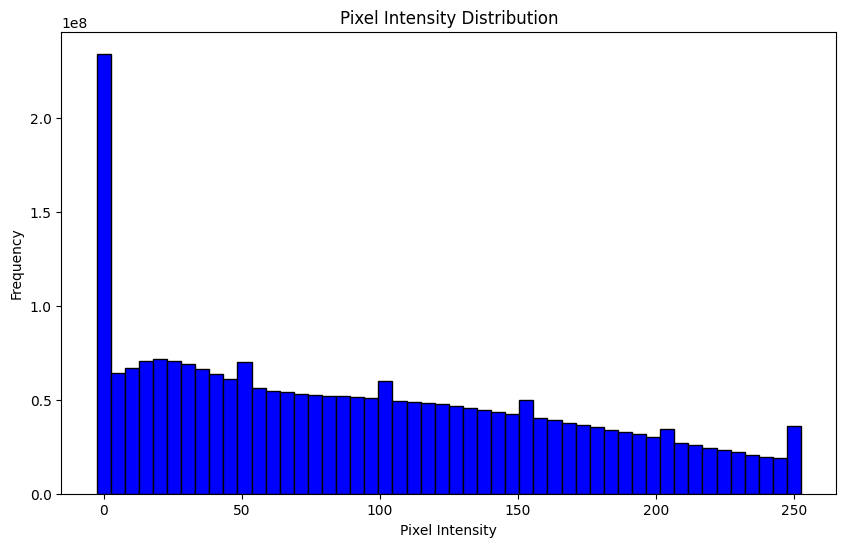

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pixel_intensity_distribution(X):
    plt.figure(figsize=(10, 6))

    # Initialize histogram bins and counts
    bins = np.linspace(0, 255, num=51)  # 50 bins for intensity values between 0 and 255
    hist_counts = np.zeros_like(bins[:-1], dtype=np.int64)

    # Incrementally update histogram counts
    for image in X:
        # Flatten the image to get pixel values and use numpy's histogram function
        pixel_values = image.flatten()
        counts, _ = np.histogram(pixel_values, bins=bins)
        hist_counts += counts  # Update the counts

    # Plot the histogram using the calculated counts
    plt.bar(bins[:-1], hist_counts, width=bins[1]-bins[0], color='blue', edgecolor='black')
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

# Call the function with the list of images X
plot_pixel_intensity_distribution(X)
